# 线性回归

给定已标记数据集 $D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ... , (\mathbf{x}_n, y_n)\},$ 其中 $ \mathbf{x}_i = (x_{i1}, x_{i2}, ...,x_{id}), y_i\in \widehat{C} = \{C_1, C_2, ... , C_b\}$. “线性回归”（linear regression）试图学习一个与数据集误差足够小的线性映射。 

**属性的“序”特性：**
1. 对于离散属性，如果属性值之间存在“序”关系，可以通过连续化（实际操作中就是转化为int/float型数据）转化为连续值，例如三值属性“高度”（高、中、低）可以转化为{3,2,1};


2. 如果属性之间不存在序关系，若将其连续化，会对后续处理如距离计算等造成误导；**这个时候通常将其化为n维向量。比如(1,0,0),(0,1,0),(0,0,1)。**

## 一元线性回归

对于集合$D = \{(x_i, y_i)\}_{i=1}^m,$一元线性回归试图学习得到如下映射关系：

$$f(x_i) = w x_i + b  \quad s.t. f(x_i) \approx y_i, \quad (x_i, y_i) \in D$$

写成矩阵的形式如下：
$$
\left(                 
\begin{array}{cc}   
x_1 & 1\\  
x_2 & 1\\  
\vdots & 1\\ 
x_m & 1\\ 
\end{array} 
\right)
\left(                 
\begin{array}{cc}
w\\
b\\
\end{array}\right)=
\left(
\begin{array}{cc}
y_1\\
y_2\\
\vdots\\
y_m\\
\end{array} 
\right)
$$

我们通过MSE来度量 $f(x_i)$与 y 之间的误差 $E(w,b)=\sum_{i=1}^m (y_i - w x_i - b)^2$，进而也得到了 w 和 b 的值：

$$\begin{split}(w^*, b^*) =  &\arg\min_{(w, b)} \sum_{i=1}^m (f(x_i) - y_i)^2 \\
= & \arg\min_{(w, b)} \sum_{i=1}^m (y_i - w x_i - b)^2
\end{split}$$

将 $E(w,b)$ 分别对 w,b 进行求导，导数等于0：

$$\begin{split}
&\frac{\partial E(w,b)}{\partial w} = 2\left( w\sum_{i=1}^m x_i^2 - \sum_{i=1}^m(y_i-b)x_i\right)=0\\
&\frac{\partial E(w,b)}{\partial b} = 2\left( mb - \sum_{i=1}^m(y_i-wx_i)\right)=0\\
\end{split}$$

得到 w,b 的最优闭式解：

$$\begin{split}
& w=\frac{\sum_{i=1}^m y_i(x_i-\bar{x})}{\sum_{i=1}^m x_i^2 - \frac{1}{m}\left(\sum_{i=1}^m x_i\right)^2}\\
& b= \frac{1}{m}\sum_{i=1}^m(y_i-wx_i)
\end{split}$$

其中 $\bar{x}=\sum_{i=1}^m x_i$ 为 x 的均值。

## 多元线性回归

更一般的情形是本节开头所提到的数据集 $D = \{ (\mathbf{x}^1, y_1), (\mathbf{x}^2, y_2), ... , (\mathbf{x}^m, y_m)\},\mathbf{x}^i = (x^i_{0},x^i_{1}, x^i_{2}, ...,x^i_{n})$。 我们试图获得学习器（逼近函数）：

$$ h_\theta(\mathbf{x}^k) = \theta_0 x_0^k + \theta_1 x_1^k + ... + \theta_n x_n^k \quad s.t. \quad h_\theta(\mathbf{x}^k) \approx y_k, \quad (\mathbf{x}_k, y_k) \in D$$

其中 $x_0^k=1$。

写成矩阵的形式如下：
$$
\left(                 
\begin{array}{cc}   
x^1_0 & x^1_1 & \cdots & x^1_n\\  
x^2_0 & x^2_1 & \cdots & x^2_n\\    
\vdots & \vdots & \cdots & \vdots\\  
x^m_0 & x^m_1 & \cdots & x^m_n\\  
\end{array} 
\right)
\left(                 
\begin{array}{cc}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n\\
\end{array}\right)=
\left(
\begin{array}{cc}
y_1\\
y_2\\
\vdots\\
y_m\\
\end{array} 
\right)
$$

简写为

$$\mathbf{X}\mathbf{\theta} = \mathbf{y}$$

对应的成本函数是：

$$\begin{split}
J(\mathbf{\theta})= &\frac{1}{2m}\sum_{i=1}^{m}(h(\textbf{x}^{(i)})-y^{(i)})^{2}\\
=& \frac{1}{2m}(\mathbf{X \theta} - \mathbf{y})^T(\mathbf{X\theta} - \mathbf{y})
\end{split}$$

其中 X 是 m*(n+1)的训练样本矩阵。

$J(\mathbf{\theta})$ 对 $\mathbf{\theta}$ 求导并且等于 $\mathbf{0}$，得到

$$\frac{\partial J(\mathbf{\theta})}{\partial \mathbf{\theta}} = 2 \mathbf{X}^T(\mathbf{X}\mathbf{\theta} - \mathbf{y})=\mathbf{0}$$

如果 $\mathbf{X}^T\mathbf{X}$ 为满秩矩阵或者正定矩阵时，我们有

$$\mathbf{\theta}^\ast = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

现实任务中 $\mathbf{X}^T\mathbf{X}$ 往往不是满秩矩阵，比如许多任务中我们会遇到特征个数超过样例个数，导致 $\mathbf{X}$ 列数多于行数，此时可以解出多个解都满足 MSE 最小化。可以通过引入正则化，由学习算法的归纳偏好来决定引入哪个解。

当矩阵过大时，求逆运算不是很容易，矩阵不可逆时，上述的最小二乘法求解最优参数是不可行的。所以我们通过如下的梯度下降迭代的方法寻找最佳参数。

## 梯度下降法求解

梯度下降法的求解公式如下：

$$\begin{split}\theta_j = &\theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\
= &\theta_j - \frac{\alpha}{m}\sum_{i=1}^{m}(h(\textbf{x}^{(i)})-y^{(i)})x_j^{(i)}
\end{split}$$

更详细的内容请参考**“CH2_最优化理论”**。

## 模型优化

优化方法：增加多项式特征（对原来的特征进行加法和乘法，来产生新的特征）

注意：在生成多项式特征前，一定要对原来的特征数据进行归一化处理，可以指定sklearn.linear_model.LinearRegression的参数normalize=True

优化实现方法：

`def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    return pipeline`

## 示例：测算房价

使用sklearn 自带的波士顿房价数据来训练模型，然后用模型来预测房价。

In [1]:
#导入数据
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
X.shape

(506L, 13L)

In [2]:
# 查看特征标签
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [15]:
#数据分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# 训练模型计算得分
from sklearn.linear_model import LinearRegression
import time

model = LinearRegression()

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print 'elaspe: {0:.6f}; train_score: {1:.6f}; cv_score: {2:.6f}'.format(time.clock() - start, train_score, cv_score)

elaspe: 0.002335; train_score: 0.723941; cv_score: 0.795262


In [21]:
for i in range(len(boston.feature_names)):
    print 'correlation of feature {0} is {1:.6f}'.format(boston.feature_names[i], model.coef_[i])

correlation of feature CRIM is -0.123898
correlation of feature ZN is 0.048182
correlation of feature INDUS is -0.047450
correlation of feature CHAS is 3.369389
correlation of feature NOX is -15.663549
correlation of feature RM is 3.594194
correlation of feature AGE is -0.009332
correlation of feature DIS is -1.470891
correlation of feature RAD is 0.305054
correlation of feature TAX is -0.010840
correlation of feature PTRATIO is -0.908791
correlation of feature B is 0.010035
correlation of feature LSTAT is -0.477715


从得分情况看，模型欠拟合，我们**首先将特征归一化，然后再加入多项式特征（这个操作相当于将训练样本从低维度映射到高维度，一种“核函数”）。归一化`model = LinearRegression(normalize=True) `的目的在于加快算法收敛速度，优化效率，在增加多项式特征的时候，不会让特征的数据尺度影响多项式特征。**

In [1]:
# 通过pipeline将多项式特征、归一化（from sklearn.preprocessing import StandardScaler）、线性拟合连接起来

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    return pipeline

elaspe: 4.577978


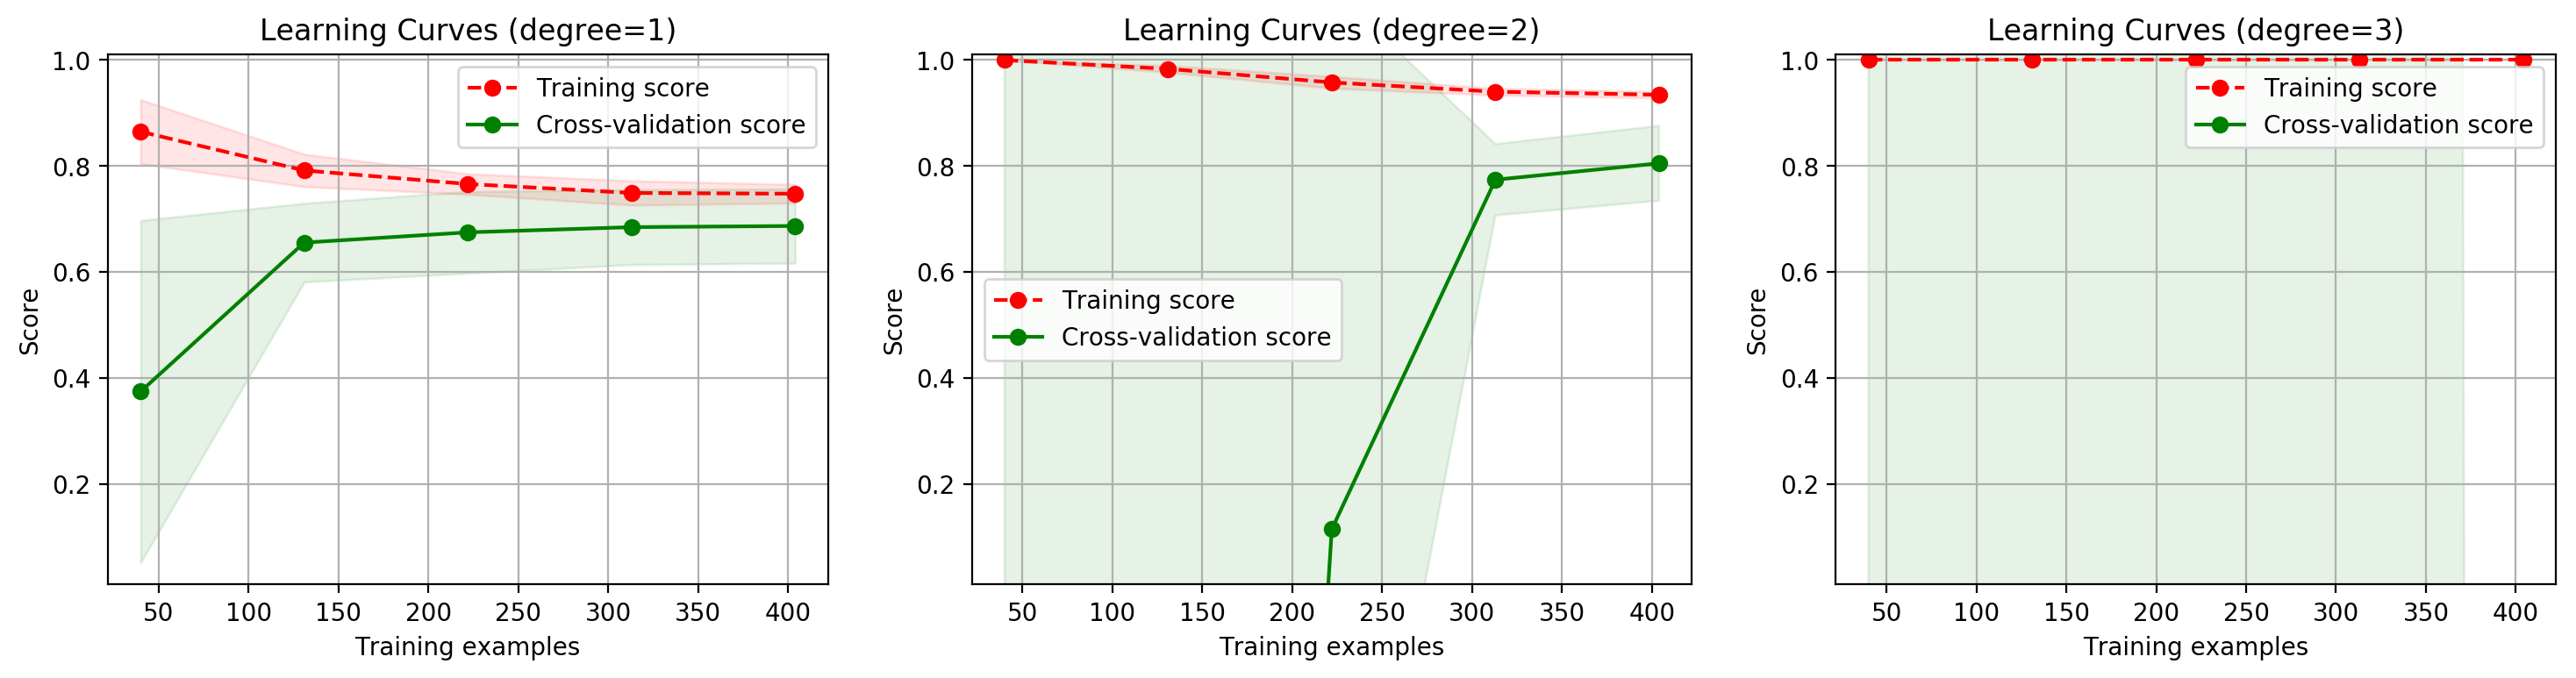

In [12]:
# 按照多项式degree增加画出学习曲线
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4))
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3]

start = time.clock()
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))

从上图可以看出：
1. 一阶多项式欠拟合，针对训练样本的得分偏低，属于高偏差；
2. 三阶多项式过拟合train_score曲线和test_score曲线之间的面积很大，看不到test_score曲线；
3. 二阶多项式也是过拟合，两个曲线之间面积大于一阶多项式，但可以看到随着训练数据增大，面积差有减小的趋势，可以考虑增加训练数据。